# Machine Learning Applied to Titanic Dataset to Predict Passengers Survival
* The data used in this project can be downloaded here: https://www.kaggle.com/competitions/titanic
* The aim of this project is to develop an ML model that can predict whether a passenger survived or not.

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from collections import Counter
from sklearn.model_selection import GridSearchCV

In [138]:
# Loading training and testing dataset
train_data= pd.read_csv("/Users/Samual/OneDrive - aucegypt.edu/Documents/Data Analytics/Titanic Project/train.csv")
test_data= pd.read_csv("/Users/Samual/OneDrive - aucegypt.edu/Documents/Data Analytics/Titanic Project/test.csv")

print("Train data shape: {}".format(train_data.shape))
print("Test data shape: {}".format(test_data.shape))

Train data shape: (891, 12)
Test data shape: (418, 11)


In [119]:
#print(train_data.head(5))
print("\n","%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%","\n")
# Better way to show few lines of the testing dataset
test_data.head(5)


 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [120]:
# Show information about the training and testing dataset
train_data.info()
print("\n","%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%","\n")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------

In [121]:
# Finding the count, mean, std, min, max of each data column
print(train_data.describe())
print("\n","%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%","\n")
train_data.describe()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [122]:
# The number of those that survived
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [140]:
# Check missing data
missing_train_data = train_data.isnull().sum()
print(missing_train_data[missing_train_data > 0])

print("\n","%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%","\n")

missing_test_data = test_data.isnull().sum()
print(missing_test_data[missing_test_data > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64

 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 

Age       86
Fare       1
Cabin    327
dtype: int64


# Exploratory Data Analysis
Here, EDA is done to see if there are insights that might help in filling missing data, and in feature selection

In [141]:
# Creating copies of training and test datasets
training_data = train_data.copy()
testing_data = test_data.copy()

# Drpping the column with a lot of missing data. In this case, the column "Cabin" is dropped. 
# I am also going to drop columns that will not give us useful information ("PassengerId", "Name", and  "Ticket" have no categorical value)
def drop_columns(data, columns):
    data = data.drop(columns, axis=1, inplace=True)
    return data

columns = ["Cabin","PassengerId","Name","Ticket"]
drop_columns(train_data, columns)
drop_columns(test_data, columns)

print(train_data.shape)
print(test_data.shape)

(891, 8)
(418, 7)


In [142]:
# We have some outliers so we will use median to fill in missing values in Age.

def fill_missing(data, column):
    data[column].fillna(data[column].median(),inplace=True)
    return data

column = "Age"

fill_missing(train_data, column)
fill_missing(test_data, column)

missing_train_data = train_data.isnull().sum()
print(missing_train_data[missing_train_data > 0])

Embarked    2
dtype: int64


In [143]:
# Compute the median of the "Age" and "Fare" coulmn
print(train_data["Age"].median()) # I can also use mean
print(train_data["Fare"].median())

28.0
14.4542


In [127]:
# Categorizing passengers and counting them based on the paid fare
train_data['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

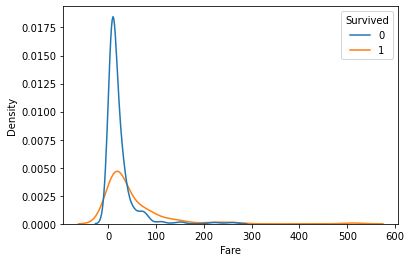

In [144]:
# Plot
train_data['Fare'].value_counts()
sns.kdeplot(data=train_data, x="Fare", hue="Survived")

<AxesSubplot:xlabel='Fare'>

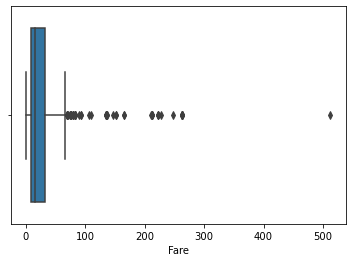

In [145]:
# Plot
sns.boxplot(x=test_data["Fare"])

In [146]:
# We will use median again to fill in missing values for Fare
fill_missing(test_data, "Fare")

test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

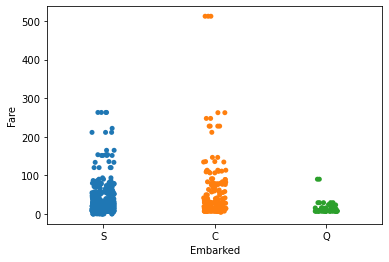

In [147]:
#   Plot - relationship between Fare and Embarked
sns.stripplot(data=train_data,x="Embarked", y="Fare")

<AxesSubplot:xlabel='Age', ylabel='Fare'>

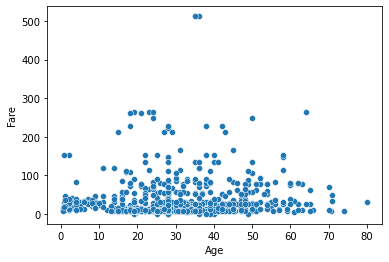

In [148]:
# Plot - relationship between Fare and Age
sns.scatterplot(data=train_data, x="Age", y="Fare")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

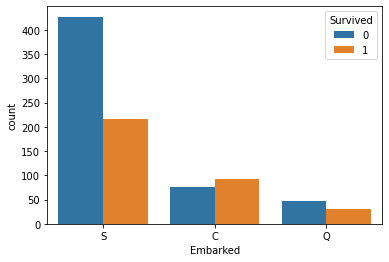

In [149]:
# Plot
sns.countplot(x="Embarked", hue="Survived", data=train_data)

* The graph showed that more passengers embarked on the trip at Southampton port, than others (Queenstown in Ireland and Cherbourg in France). The highest death is from this port and the port has a death value that is twice the number that survived.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

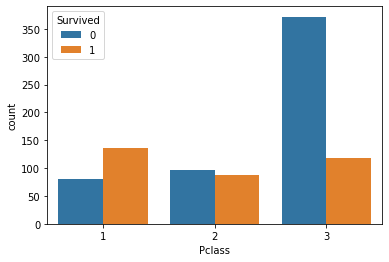

In [150]:
# Plot
sns.countplot(x="Pclass", hue="Survived", data=train_data)

* The Pclass 3 had a very high number of passengers but the survival rate in the class is also lower than the other two classes.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

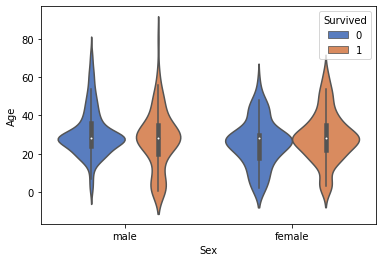

In [151]:
# Plot - relationship between Age, Sex and Survived
sns.violinplot(x="Sex", y="Age", hue="Survived",
                    data=train_data, palette="muted")

<AxesSubplot:xlabel='Sex', ylabel='count'>

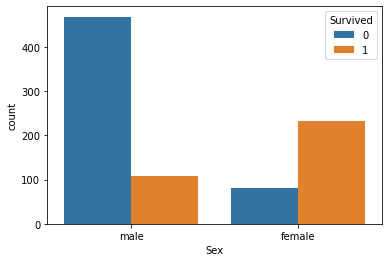

In [152]:
# Plot
sns.countplot(x='Sex', hue='Survived', data=train_data)

* More males died as compared to females

In [153]:
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

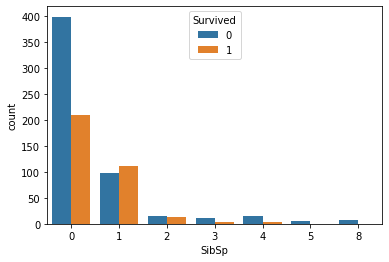

In [154]:
# Plot
sns.countplot(x='SibSp', hue='Survived', data=train_data)

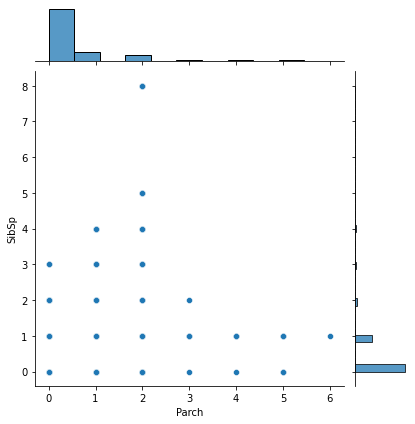

In [112]:
# Is there a relationship between SibSp and Parch
sns.jointplot(data=train_data, x="Parch", y="SibSp")

* There is no visible relationship between SibSp and Parch

# Categorical Feature Encoding

In [155]:
# For the Sex feature, I am going to replace Male with 1 and Female with 0

train_data['Sex']=train_data['Sex'].replace('male', 0)
train_data['Sex']=train_data['Sex'].replace('female', 1)

test_data['Sex']=test_data['Sex'].replace('male', 0)
test_data['Sex']=test_data['Sex'].replace('female', 1)

In [156]:
# View data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [157]:
# Replacing missing values of Embarked with Mode value
train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True)

In [158]:
# Check again if there are no columns with missing data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [160]:
# To view few lines of the test data
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,Q
1,3,1,47.0,1,0,7.0000,S
2,2,0,62.0,0,0,9.6875,Q
3,3,0,27.0,0,0,8.6625,S
4,3,1,22.0,1,1,12.2875,S


* Here, I will split the features (inputs) and labels (target) on our train data set

In [161]:
# Treating all the nominal variables at once using dummy variables

train_data_new=pd.get_dummies(train_data)
test_data_new=pd.get_dummies(test_data)

# Adding Target Variable to the data
train_data_new["Survived"]=train_data["Survived"]

# Printing sample rows
train_data_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [162]:
# Training data in form of inputs and the corresponding prediction
X = train_data_new.iloc[:, 1:]
y = train_data_new.iloc[:, 0]

In [163]:
# To view few row in X
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1


In [164]:
# Normalization of numerical features
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

train_minmax = minmax.fit_transform(X)

X = pd.DataFrame(train_minmax, columns=X.columns)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0
1,0.0,1.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0
3,0.0,1.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0
4,1.0,0.0,0.434531,0.000,0.0,0.015713,0.0,0.0,1.0


# Train, test and split

In [183]:
# Spliting the train and test dataset after transformation and normalization
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
Logistic Regression.
k-Nearest Neighbors.
Decision Trees.
Support Vector Machine.
Naive Bayes

In [166]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [167]:
# K-Neighbor classifier 
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [168]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [170]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [169]:
# Support vector machine
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
# Import not working
"""
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False)
xgb_model.fit(X_train, y_train)
"""

# Model Evaluation

In [172]:
# Model Evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_model(model):
    y_pred = model.predict(X_test)
    print("Metrics for {} model are: ".format(model) + "\n")
    print("f1 score: {}".format(f1_score(y_test, y_pred, average="macro")))
    print("precision score : {}".format(precision_score(y_test, y_pred, average="macro")))
    print("recall score : {}".format(recall_score(y_test, y_pred, average="macro")))
    print("\n")

model_list = [log_reg_model,knn_model,tree_model, forest_model, svm_model]

for model in model_list:
    evaluate_model(model) 

Metrics for LogisticRegression() model are: 

f1 score: 0.7908878504672898
precision score : 0.7939711664482307
recall score : 0.7886743886743887


Metrics for KNeighborsClassifier() model are: 

f1 score: 0.8025051921079958
precision score : 0.8057011795543906
recall score : 0.8001930501930501


Metrics for DecisionTreeClassifier() model are: 

f1 score: 0.7713336739908023
precision score : 0.7698654480832698
recall score : 0.7736164736164737


Metrics for RandomForestClassifier() model are: 

f1 score: 0.7980139923267886
precision score : 0.798655983458258
recall score : 0.7974259974259974


Metrics for SVC() model are: 

f1 score: 0.7772808285973702
precision score : 0.8016249640494679
recall score : 0.7699485199485199




# Model Prediction

In [173]:
# Using the KNN model
knn_model.fit(X, y)

KNeighborsClassifier()

In [185]:
y_preds = knn_model.predict(X_test)

In [188]:
# Prediction
xx_test = test_data_new.iloc[:, :]
from sklearn.preprocessing import MinMaxScaler
minimax = MinMaxScaler()

test_minimax = minimax.fit_transform(xx_test)
Xx_test= pd.DataFrame(test_minimax, columns=xx_test.columns)

y_preds = knn_model.predict(Xx_test)